In [27]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
data = pd.read_csv('./HW2 附件/HW2_hr-analytics_train.csv')

In [28]:
df = data.copy()
# check nan
def check_nan(df):
    return df.isna().any().any()

def onehot_encoding(df, column_name):
    df_encoded = pd.get_dummies(df, columns=[column_name], prefix=[column_name])
    print(df.shape, "->", df_encoded.shape)
    return df_encoded

def pprint(output = '\n', show_time = False): # print and fprint at the same time
    global filename
    print(output)
    with open(filename, 'a') as f:
        if show_time:
            f.write(datetime.now().strftime("[%Y-%m-%d %H:%M:%S] "))

        f.write(str(output))
        f.write('\n')
        
def check_non_numeric_values(df, column_name):
    """
    Check if any value in the specified column is not int or float.

    Parameters:
    df (DataFrame): The DataFrame to check.
    column_name (str): The name of the column to check.

    Returns:
    bool: True if any non-numeric value is found, False otherwise.
    """
    # Get the specified column
    column = df[column_name]

    # Check if any value is not int or float
    non_numeric_values = column[~column.apply(lambda x: isinstance(x, (int, float)))]
    
    return not non_numeric_values.empty

def count_unique_values(df, column_name):
    """
    Count the number of unique values in the specified column.

    Parameters:
    df (DataFrame): The DataFrame to check.
    column_name (str): The name of the column to count unique values for.

    Returns:
    int: The count of unique values.
    """
    unique_values = df[column_name].nunique()
    return unique_values

col_not_num = []
for col in df.columns:
    if check_non_numeric_values(df, col):
        col_not_num.append(col)

print(f"Doing onehot encoding on col: {col_not_num}")
for col in col_not_num:
    df = onehot_encoding(df, col)


Doing onehot encoding on col: ['sales', 'salary']
(10000, 10) -> (10000, 19)
(10000, 19) -> (10000, 21)


In [5]:
target_column = 'left'
test_size = 0.2
random_state = 42
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

In [6]:
# Method 4: Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to select the top k features based on ANOVA F-statistics
k = 5  # Set the number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Create a new logistic regression model
logistic_regression = LogisticRegression()

# Fit the model with selected features
logistic_regression.fit(X_train_selected, y_train)

selector = SelectKBest(score_func=f_classif, k=k)
y_pred = logistic_regression.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)

# Method 5: Class Imbalance Handling
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a logistic regression model on the resampled data
logistic_regression.fit(X_resampled, y_resampled)
logistic_regression.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)


# Evaluate the model on the test set
y_pred = logistic_regression.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)

# Method 6:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
degree = 4  # Choose the degree of polynomial features
polyreg = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)

Improved Accuracy: 0.763


/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Improved Accuracy: 0.776
Improved Accuracy: 0.801


/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# TRAIN

model = LogisticRegression()
model.fit(X_train, y_train)


# Define hyperparameters to search
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Regularization type
#     'solver': ['liblinear'],  # Suitable for small datasets
# }
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solvers for optimization
    # 'max_iter': [100, 1000, 10000],  # Maximum number of iterations
    'fit_intercept': [True, False],  # Whether to fit the intercept
    'class_weight': [None, 'balanced'],  # Class weights for imbalanced datasets
    'multi_class': ['auto', 'ovr', 'multinomial'],  # Multi-class strategy
    'warm_start': [True, False],  # Whether to reuse the solution of the previous call
    # Add more hyperparameters as needed
}
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Perform hyperparameter tuning with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)


/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

KeyboardInterrupt: 

In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create base classifiers (including logistic regression)
logistic_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
svm = SVC(probability=True)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('lr', logistic_reg),
    ('dt', decision_tree),
    ('svm', svm)
], voting='soft')  # 'soft' for weighted voting based on probabilities
voting_classifier = VotingClassifier(estimators=[
    # ('lr0', logistic_reg),
    # ('lr1', logistic_reg),
    # ('lr2', logistic_reg),
    # ('lr3', logistic_reg),
    # ('lr4', logistic_reg),
    ('dt', decision_tree),
    # ('svm', svm)
], voting='soft')  # 'soft' for weighted voting based on probabilities
# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)


Improved Accuracy: 0.976


In [37]:
clf = DecisionTreeClassifier(random_state=42)
# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions using the model

y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)

importances = clf.feature_importances_
feature_names = X.columns

# Create a list of (importance, feature) tuples
feature_importance = list(zip(importances, feature_names))
print(feature_importance)

# Sort the list in descending order of importance
feature_importance.sort(reverse=True)
important_list = []
# Print the top 5 important features
print("Top 5 Important Features:")
for i, (importance, feature) in enumerate(feature_importance[:5], start=1):
    print(f"{i}. {feature}: {importance:.4f}")
    important_list.append(feature)
print(important_list)


Improved Accuracy: 0.975
[(0.5147323081341414, 'satisfaction_level'), (0.11662892727774292, 'last_evaluation'), (0.10483332342520556, 'number_project'), (0.11310879473351797, 'average_montly_hours'), (0.12525526588382416, 'time_spend_company'), (0.003236310873068411, 'Work_accident'), (1.1923123420581744e-05, 'promotion_last_5years'), (0.0017031279663691705, 'sales_IT'), (0.00020833457205844693, 'sales_RandD'), (0.0009919670508224399, 'sales_accounting'), (0.0005721007598456974, 'sales_hr'), (0.0002925392426671579, 'sales_management'), (0.00019795637833661643, 'sales_marketing'), (0.00043481724910620175, 'sales_product_mng'), (0.0034487699212452576, 'sales_sales'), (0.002362091590209064, 'sales_support'), (0.0031575823088255983, 'sales_technical'), (0.0030224656072375348, 'salary_high'), (0.002553620298922397, 'salary_low'), (0.0032477736034334705, 'salary_medium')]
Top 5 Important Features:
1. satisfaction_level: 0.5147
2. time_spend_company: 0.1253
3. last_evaluation: 0.1166
4. avera

In [39]:
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train[important_list], y_train)

# Make predictions using the model

y_pred = clf.predict(X_val[important_list])
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)

Improved Accuracy: 0.976


In [41]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None, filled=True, feature_names=X_train[important_list].columns, class_names=["0", "1"])

# # Create a graph from the DOT data
# graph = graphviz.Source(dot_data)

# # Render and display the tree
# graph.render("decision_tree_rules")

# # Print the rules to the console
# with open("decision_tree_rules") as f:
#     rules = f.read()
#     print("Decision Tree Rules:")
#     print(rules)
graph = graphviz.Source(dot_data)

# Render and display the tree
graph.render("decision_tree_rules")

# Display the Decision Tree with rules in a graphical format
graph.view()

'decision_tree_rules.pdf'

0        satisfaction_level
4        time_spend_company
1           last_evaluation
3      average_montly_hours
2            number_project
14              sales_sales
19            salary_medium
5             Work_accident
16          sales_technical
17              salary_high
18               salary_low
15            sales_support
7                  sales_IT
9          sales_accounting
10                 sales_hr
13        sales_product_mng
11         sales_management
8               sales_RandD
12          sales_marketing
6     promotion_last_5years
Name: Feature, dtype: object


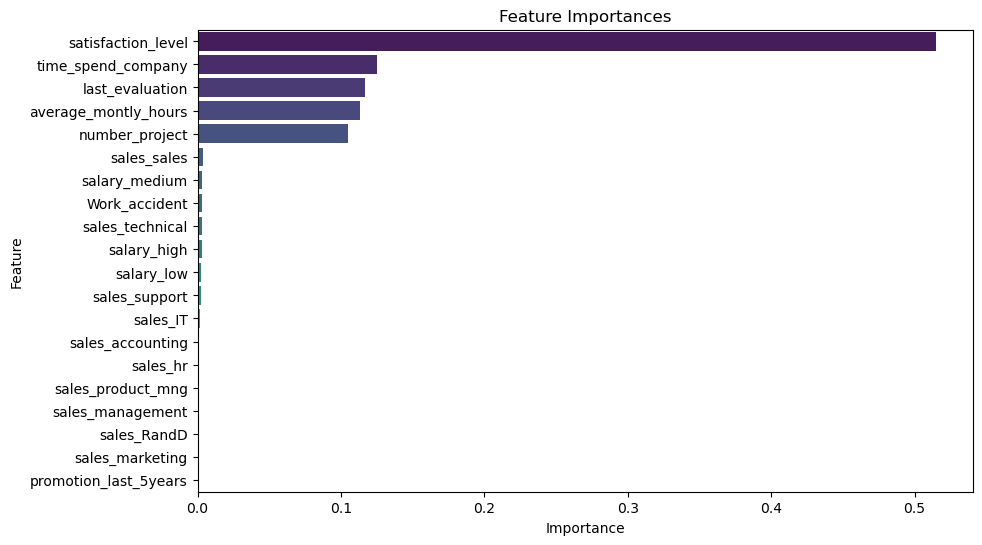

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df['Feature'])
# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

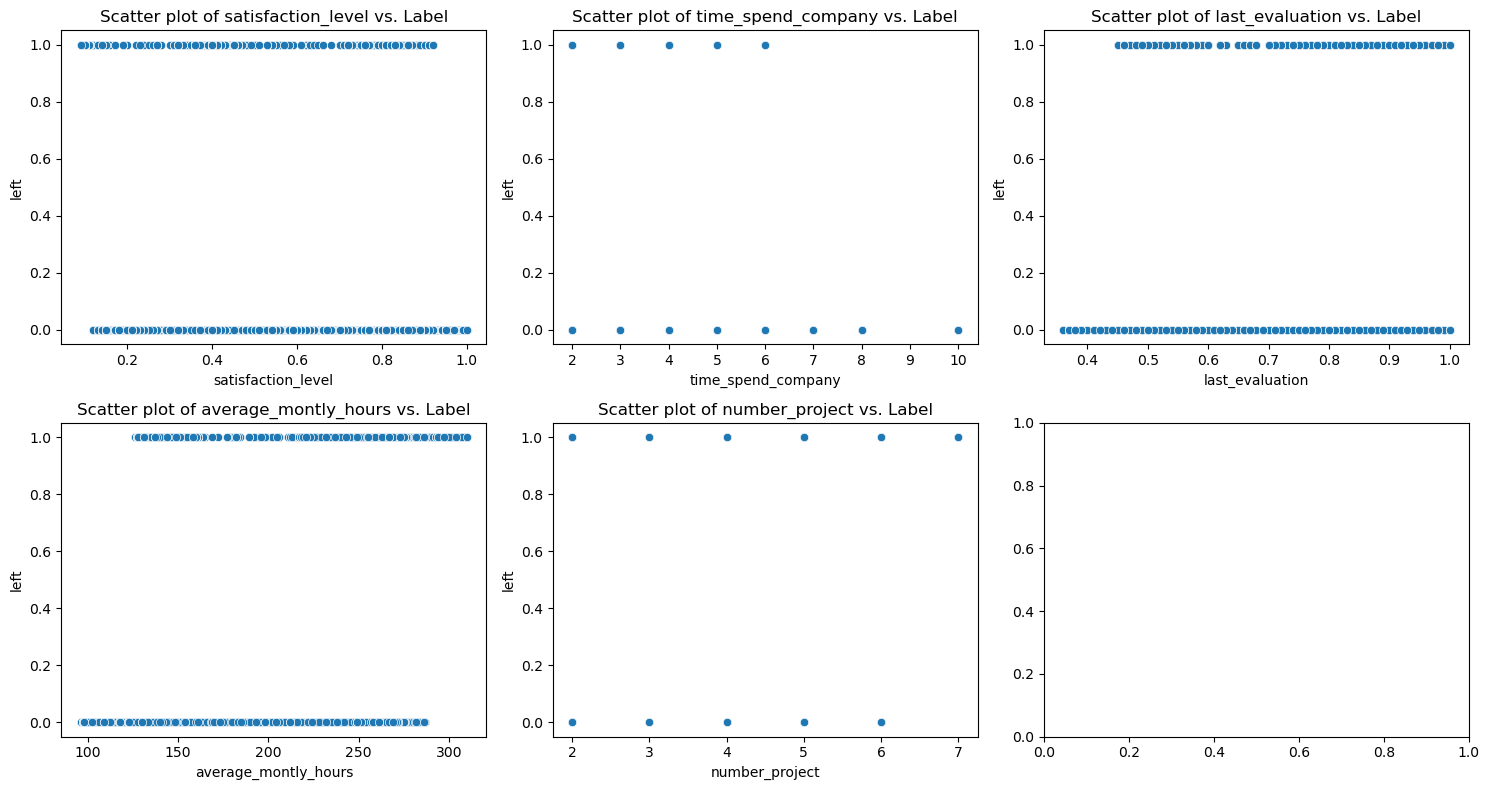

In [42]:
top_5_features = feature_importance_df['Feature'].head(5)

# Create a subplot for each of the top 5 important features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

df_plot = df.sort_values(by='left').reset_index(drop=True)
for i, feature in enumerate(top_5_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    if feature in X.select_dtypes(include='number').columns:
        # Numerical feature: Create a scatter plot
        sns.scatterplot(x=feature, y='left', data=df_plot, ax=ax)
        ax.set_title(f"Scatter plot of {feature} vs. Label")
    else:
        # Categorical feature: Create a bar plot
        sns.barplot(x=feature, y='Label', data=df_plot, ax=ax)
        ax.set_title(f"Bar plot of {feature} vs. Label")

plt.tight_layout()
plt.show()

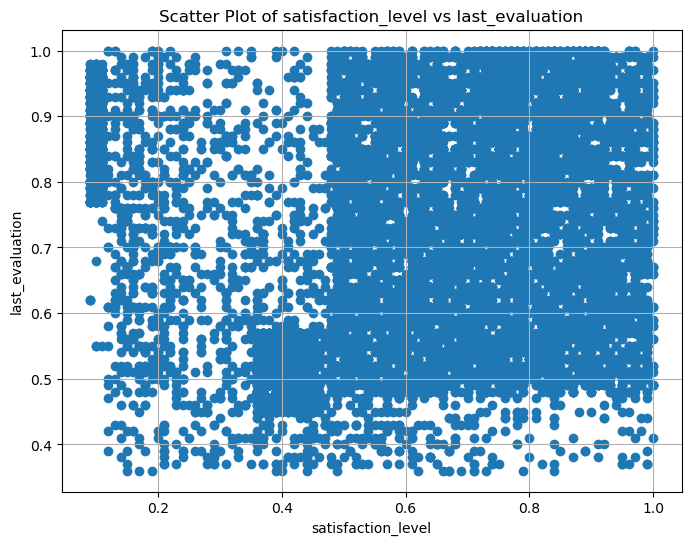

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the columns you want to plot
x_column = 'satisfaction_level'
y_column = 'last_evaluation'
df_plot = df.sort_values(by=x_column).reset_index(drop=True)
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_plot[x_column], df_plot[y_column])
plt.title(f"Scatter Plot of {x_column} vs {y_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

# Show the plot
plt.show()


In [107]:
degrees = [2, 3, 4]

# Create a list of logistic regression models with different polynomial degrees
logistic_models = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    model = LogisticRegression()
    model.fit(X_train_poly, y_train)
    logistic_models.append(('degree' + str(degree), model))

# Create a VotingClassifier to aggregate predictions from different models
voting_model = VotingClassifier(estimators=logistic_models, voting='soft')

# Fit the ensemble model to the training data
voting_model.fit(X_train, y_train)

# Make predictions
y_pred = voting_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)

/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Improved Accuracy: 0.776


/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [109]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create base classifiers (including logistic regression)
base_classifiers = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svm', svm)
]
base_classifiers = [
    ('lr0', LogisticRegression()),
    # ('lr1', DecisionTreeClassifier()),
    ('lr1', voting_classifier)
]
# Create a Stacking Classifier with logistic regression as the meta-learner
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

# Fit the Stacking Classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred = stacking_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Improved Accuracy:", accuracy)


/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Improved Accuracy: 0.774


/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [83]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(y_pred.shape)
# Calculate the confusion matrix
confusion = confusion_matrix(y_val, y_pred)
print(confusion)

def metrics(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Calculate recall (sensitivity)
    recall = recall_score(y_test, y_pred)
    print("Recall (Sensitivity):", recall)

    # Calculate F1 score (harmonic mean of precision and recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)
    # Calculate ROC AUC (Receiver Operating Characteristic Area Under the Curve)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC:", roc_auc)

metrics(y_val, y_pred)


(1000,)
[[700  59]
 [165  76]]
Accuracy: 0.776
Precision: 0.562962962962963
Recall (Sensitivity): 0.3153526970954357
F1 Score: 0.4042553191489362
ROC AUC: 0.6188094183764398


/Users/liushiwen/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
result = y_pred.reshape(-1, 1)  # Reshape to (1000, 1)
# Create a DataFrame with one column 'left'
result_df = pd.DataFrame(data=result, columns=['left'])
print(result_df)
result_df.to_csv('HW2_hr-analytics_test_sol.csv', index=False)

     left
0       0
1       0
2       1
3       0
4       0
..    ...
995     0
996     0
997     0
998     0
999     0

[1000 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline that includes polynomial features and logistic regression
degree = 2  # Choose the degree of polynomial features
polyreg = make_pipeline(PolynomialFeatures(degree), LogisticRegression())

# Define hyperparameters to search
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__penalty': ['l1', 'l2'],  # Regularization type
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solvers
}

# Create a grid search for hyperparameter tuning
grid_search = GridSearchCV(polyreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(X_test)
